# Restrições

- Problemas com restrições são mais difíceis;
- Mesmo se o conjunto de restrições e a função são convexos, é mais díficl.

## Classificação das restrições

- Irrestrito: $\Omega = \mathbb{R}^n$;
- Conjunto factível poliedral: $\Omega = \{x : b_{\ell} \leq Ax \leq b_u\}$
    - Caixa: $\Omega = \{x : \ell \leq x \leq u\}$;
    - Igualdade: $\Omega = \{x : Ax = b\}$;
- Restrições gerais
    - Igualdades: $\Omega = \{x : h(x) = 0\}$;
    - Desigualdades: $\Omega = \{x : g(x) \leq 0\}$.

## Problemas com restrições de igualdade

$$ \min \ f(x) \qquad \text{suj. a}\qquad h(x) = 0. $$

$$\nabla f(x) + \sum_{i = 1}^m \lambda_i^* \nabla h_i(x^*) = 0.$$

In [5]:
using JuMP, Ipopt, Plots, Interact

Interact.Options{:SelectionSlider,Float64}(15: "input-5" = 1.0888888888888888 Float64 , "param", 1.0888888888888888, "1.0888888888888888", 50, Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.022222222222222223"=>0.0222222,"0.044444444444444446"=>0.0444444,"0.06666666666666667"=>0.0666667,"0.08888888888888889"=>0.0888889,"0.1111111111111111"=>0.111111,"0.13333333333333333"=>0.133333,"0.15555555555555556"=>0.155556,"0.17777777777777778"=>0.177778,"0.2"=>0.2…), Dict(0.333333=>"0.3333333333333333",0.822222=>"0.8222222222222222",1.2=>"1.2",1.88889=>"1.8888888888888888",2.04444=>"2.0444444444444443",2.0=>"2.0",1.15556=>"1.1555555555555554",2.15556=>"2.1555555555555554",0.377778=>"0.37777777777777777",1.4=>"1.4"…)), Any[], Any[], true, "horizontal", true)

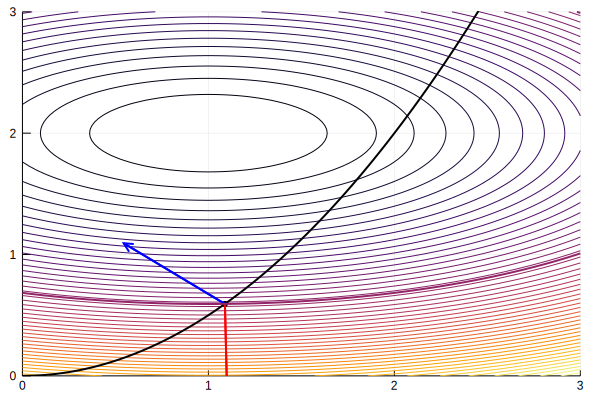

In [6]:
f(x, y) = 0.1 * ( (x - 1)^2 + 4 * (y - 2)^2 )
X, Y = linspace(0, 3, 100), linspace(0, 3, 100)
t = linspace(0, 3, 100)

@manipulate for param = linspace(0, 2.2, 100)
    contour(X, Y, f, leg=false, levels=50)

    plot!(t, t.^2 / 2, lw=2, c=:black) # y = x^2 / 2

    a = [param; param^2 / 2]
    ∇f = ForwardDiff.gradient(x -> f(x[1],x[2]), a)
    ∇c = [-param; 1] / 2

    scatter!([a[1]], [a[2]], c=:black, ms=3)
    plot!(a[1] + [0, ∇f[1]], a[2] + [0, ∇f[2]], c=:red, l=:arrow, lw=2)
    plot!(a[1] + [0, ∇c[1]], a[2] + [0, ∇c[2]], c=:blue, l=:arrow, lw=2)
    contour!(X, Y, f, levels=[f(a[1], a[2])], lw=2)

    xlims!(X[1], X[end])
    ylims!(Y[1], Y[end])
end

## Minimização com desigualdades não lineares

$$ \min f(x) \qquad \text{suj. a} \qquad c(x) \geq 0 $$

\begin{align*}
\nabla f(x) + \sum_{i = 1}^m \lambda_i^* \nabla c_i(x^*) & = 0 \\
c_i(x^*) \lambda_i^* = 0.
\end{align*}

Interact.Options{:SelectionSlider,Float64}(25: "input-8" = 0.4 Float64 , "cx", 0.4, "0.4", 4, Interact.OptionDict(DataStructures.OrderedDict("-0.2"=>-0.2,"0.0"=>0.0,"0.2"=>0.2,"0.4"=>0.4,"0.6"=>0.6,"0.8"=>0.8,"1.0"=>1.0,"1.2"=>1.2), Dict(0.0=>"0.0",0.4=>"0.4",1.0=>"1.0",1.2=>"1.2",-0.2=>"-0.2",0.2=>"0.2",0.8=>"0.8",0.6=>"0.6")), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Float64}(27: "input-9" = 0.4 Float64 , "cy", 0.4, "0.4", 4, Interact.OptionDict(DataStructures.OrderedDict("-0.2"=>-0.2,"0.0"=>0.0,"0.2"=>0.2,"0.4"=>0.4,"0.6"=>0.6,"0.8"=>0.8,"1.0"=>1.0,"1.2"=>1.2), Dict(0.0=>"0.0",0.4=>"0.4",1.0=>"1.0",1.2=>"1.2",-0.2=>"-0.2",0.2=>"0.2",0.8=>"0.8",0.6=>"0.6")), Any[], Any[], true, "horizontal", true)

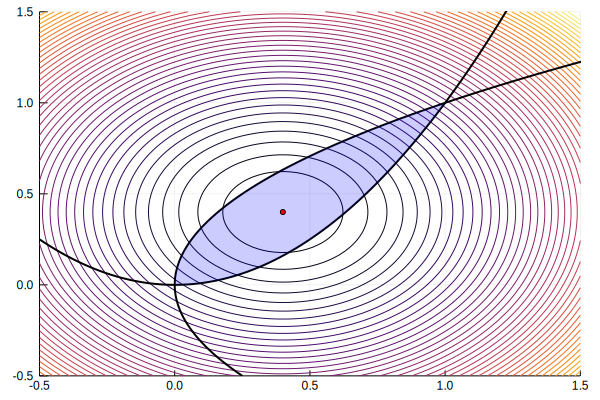

In [8]:
@manipulate for cx = -0.2:0.2:1.2, cy = -0.2:0.2:1.2
    contour(linspace(-0.5, 1.5, 100), linspace(-0.5, 1.5, 100),
            (x,y) -> (x - cx)^2 + (y - cy)^2, leg=false, levels=50)
    t = linspace(-0.5, 1.5, 100)
    plot!(t, t.^2, lw=2, color=:black)
    plot!(t.^2, t, lw=2, color=:black)
    t = linspace(0, 1, 100)
    upper = sqrt.(t)
    lower = t.^2
    plot!(t, upper, alpha=0,
            fillcolor=:blue, fillalpha=0.2, fill_between=[lower upper])

    model = Model(solver = IpoptSolver(print_level = 0))
    @variable(model, x[1:2])
    @objective(model, Min, (x[1] - cx)^2 + (x[2] - cy)^2)
    @NLconstraint(model, x[2] ≥ x[1]^2)
    @NLconstraint(model, x[1] ≥ x[2]^2)
    solve(model)

    x = getvalue(x)
    scatter!([x[1]], [x[2]], c=:red, ms=3)
    g = [x[1] - cx; x[2] - cy] / 2
    if norm(g) > 1e-4
        plot!(x[1] + [0; g[1]], x[2] + [0; g[2]], c=:red, l=:arrow)
    end
    if abs(x[2] - x[1]^2) < 1e-6
        g = [-2 * x[1]; 1.0] / 5
        plot!(x[1] + [0; g[1]], x[2] + [0; g[2]], c=:blue, l=:arrow)
    end
    if abs(x[1] - x[2]^2) < 1e-6
        g = [1.0; -2 * x[2]] / 5
        plot!(x[1] + [0; g[1]], x[2] + [0; g[2]], c=:blue, l=:arrow)
    end
        

    xlims!(-0.5, 1.5)
    ylims!(-0.5, 1.5)
end

## Minimização em Caixas

$$ \min f(x) \qquad \text{suj. a} \qquad \ell \leq x \leq u $$

Interact.Options{:SelectionSlider,Float64}(31: "input-10" = 0.7853981633974483 Float64 , "θ", 0.7853981633974483, "0.7853981633974483", 11, Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.07853981633974483"=>0.0785398,"0.15707963267948966"=>0.15708,"0.23561944901923448"=>0.235619,"0.3141592653589793"=>0.314159,"0.39269908169872414"=>0.392699,"0.47123889803846897"=>0.471239,"0.5497787143782138"=>0.549779,"0.6283185307179586"=>0.628319,"0.7068583470577035"=>0.706858…), Dict(0.785398=>"0.7853981633974483",0.235619=>"0.23561944901923448",0.0785398=>"0.07853981633974483",0.0=>"0.0",0.392699=>"0.39269908169872414",1.5708=>"1.5707963267948966",0.863938=>"0.8639379797371931",1.25664=>"1.2566370614359172",1.41372=>"1.413716694115407",0.942478=>"0.9424777960769379"…)), Any[], Any[], true, "horizontal", true)

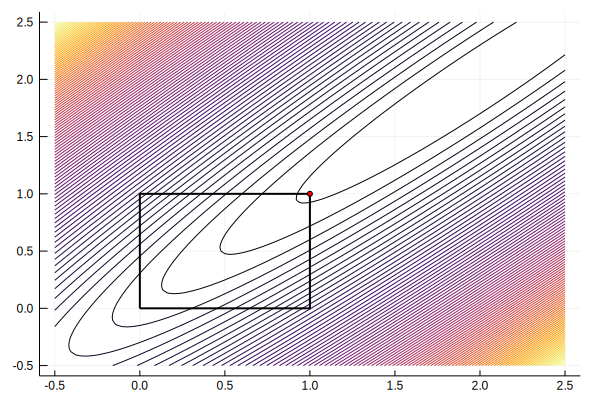

In [9]:
gr(size=(600,400))
λ = 50.0
@manipulate for θ = linspace(0, π / 2, 21)
    V = [cos(θ) -sin(θ); sin(θ) cos(θ)]
    Q = V * diagm([1.0; λ]) * V'
    c = [2.0; 2.0]
    f(x) = 0.5 * dot(x - c, Q * (x - c))
    contour(linspace(-0.5, 2.5, 100), linspace(-0.5, 2.5, 100), (x,y) -> f([x;y]), leg=false, levels=100)
    plot!([0, 1, 1, 0, 0], [0, 0, 1, 1, 0], c=:black, lw=2)

    model = Model(solver = IpoptSolver(print_level=0))
    @variable(model, 0 ≤ x[1:2] ≤ 1)
    @objective(model, Min, 0.5 * dot(x - c, Q * (x - c)))
    solve(model)

    x = getvalue(x)
    scatter!([x[1]], [x[2]], ms=3, c=:red)
end